In [1]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
%matplotlib inline

### eda

In [2]:
plastics = pd.read_csv('master_datasheet.csv', encoding = 'ISO-8859-1')

In [3]:
plastics.head()

,p_record,p_total_pieces,p_total_pieces_litre,p_lat,p_long,ocean_inland,ocean_inland_cat,sample_waters,c_city_1,c_country_1,...,distance_from_city_3,r_name_1,r_vol_1,distance_from_river_1,r_name_2,r_vol_2,distance_from_river_2,r_name_3,r_vol_3,distance_from_river_3
0,1,1,1.0,59.378683,-153.520867,Ocean,0,Coastal,haines junction,ca,...,1040.987575,Nushagak,31.0,225.769431,Susitna,45.0,288.208881,Kuskokwim,57.0,375.228343
1,2,10,10.0,59.368133,-153.552333,Ocean,0,Coastal,haines junction,ca,...,1032.655446,Nushagak,31.0,223.979313,Nushagak,31.0,225.769431,Susitna,45.0,288.208881
2,3,14,14.0,59.341467,-153.549767,Ocean,0,Coastal,haines junction,ca,...,902.375026,Nushagak,31.0,223.979313,Nushagak,31.0,224.132067,Nushagak,31.0,225.769431
3,4,17,17.0,59.638717,-153.395667,Ocean,0,Coastal,haines junction,ca,...,901.658282,Nushagak,31.0,223.979313,Nushagak,31.0,224.132067,Nushagak,31.0,225.769431
4,5,71,71.0,59.373600,-153.448067,Ocean,0,Coastal,haines junction,ca,...,899.614321,Nushagak,31.0,223.979313,Nushagak,31.0,224.132067,Nushagak,31.0,225.769431


In [4]:
plastics.shape

(2402, 29)

In [5]:
X = plastics.loc[:,'p_lat':'distance_from_river_3']
y = plastics['p_total_pieces_litre']
print(X.columns)

Index(['p_lat', 'p_long', 'ocean_inland', 'ocean_inland_cat', 'sample_waters',
       'c_city_1', 'c_country_1', 'c_population_1', 'distance_from_city_1',
       'c_city_2', 'c_country_2', 'c_population_2', 'distance_from_city_2',
       'c_city_3', 'c_country_3', 'c_population_3', 'distance_from_city_3',
       'r_name_1', 'r_vol_1', 'distance_from_river_1', 'r_name_2', 'r_vol_2',
       'distance_from_river_2', 'r_name_3', 'r_vol_3',
       'distance_from_river_3'],
      dtype='object')


In [6]:
X = X.drop(columns = ['c_city_1','c_country_1','c_city_2','c_country_2','c_city_3','c_country_3',\
                     'r_name_1','r_name_2','r_name_3','sample_waters','ocean_inland'])

In [7]:
X.head()

,p_lat,p_long,ocean_inland_cat,c_population_1,distance_from_city_1,c_population_2,distance_from_city_2,c_population_3,distance_from_city_3,r_vol_1,distance_from_river_1,r_vol_2,distance_from_river_2,r_vol_3,distance_from_river_3
0,59.378683,-153.520867,0,1148,899.614321,19616,1032.655446,540,1040.987575,31.0,225.769431,45.0,288.208881,57.0,375.228343
1,59.368133,-153.552333,0,1148,899.614321,1148,901.658282,19616,1032.655446,31.0,223.979313,31.0,225.769431,45.0,288.208881
2,59.341467,-153.549767,0,1148,899.614321,1148,901.658282,1148,902.375026,31.0,223.979313,31.0,224.132067,31.0,225.769431
3,59.638717,-153.395667,0,1148,884.968485,1148,899.614321,1148,901.658282,31.0,223.979313,31.0,224.132067,31.0,225.769431
4,59.373600,-153.448067,0,1148,884.968485,1148,895.825488,1148,899.614321,31.0,223.979313,31.0,224.132067,31.0,225.769431


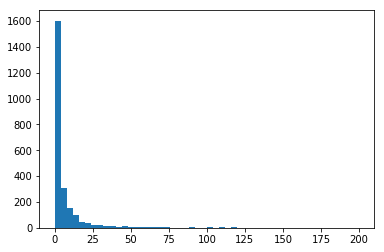

In [8]:
plt.hist(plastics.p_total_pieces_litre,range=[0,200],bins=50);

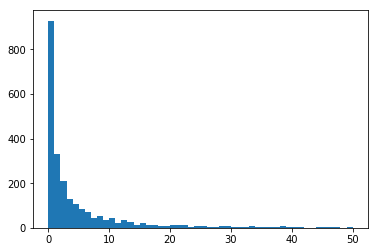

In [9]:
plt.hist(plastics.p_total_pieces_litre,range=[0,50],bins=50);

In [10]:
plastics['p_total_pieces_litre'].mean()

7.3825907586773525

In [13]:
plastics['p_total_pieces_litre'].median()

1.8181818180000002

In [11]:
plastics['p_total_pieces_litre'].max()

243.07692310000002

In [12]:
plastics['p_total_pieces_litre'].min()

0.0

### more vis & eda

In [28]:
ocean_plastics = pd.read_csv('WW Marine Datashare.csv', encoding = 'ISO-8859-1')

In [29]:
river_plastics = pd.read_csv('WW Freshwater Datashare.csv', encoding = 'ISO-8859-1')

In [32]:
ocean_plastics.rename(columns={'Total Pieces/L': 'p_total_pieces_litre'}, inplace=True)

In [33]:
river_plastics.rename(columns={'Total Pieces/L': 'p_total_pieces_litre'}, inplace=True)

/Users/andreacsorcinelli/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:780: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/andreacsorcinelli/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:781: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


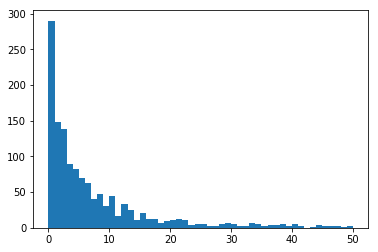

In [34]:
plt.hist(ocean_plastics.p_total_pieces_litre,range=[0,50],bins=50);

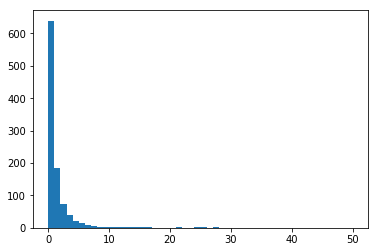

In [35]:
plt.hist(river_plastics.p_total_pieces_litre,range=[0,50],bins=50);

In [36]:
ocean_plastics['p_total_pieces_litre'].mean()

11.801373322605885

In [37]:
ocean_plastics['p_total_pieces_litre'].median()

4.166666667

In [38]:
ocean_plastics['p_total_pieces_litre'].max()

243.07692310000002

In [39]:
river_plastics['p_total_pieces_litre'].mean()

1.2821307868711602

In [40]:
river_plastics['p_total_pieces_litre'].median()

0.0

In [41]:
river_plastics['p_total_pieces_litre'].max()

27.77777778

### models

In [ ]:
# baseline model, not in this notebook had RMSE of 30 pieces/litre

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=42)

In [16]:
model_lr = LinearRegression(fit_intercept=True)
model_lr.fit(X_train, y_train)
pred_vals_lr = model_lr.predict(X_test)
RMSE_lr = np.sqrt(np.sum((pred_vals_lr - y_test)**2)/len(y_test))
RMSE_lr

20.09406554033827

In [17]:
sorted(zip(X.columns,abs(model_lr.coef_)), key=lambda x: -x[1])

[('ocean_inland_cat', 17.371984832185667),
 ('r_vol_1', 0.21060301765538936),
 ('distance_from_city_3', 0.1206703215490596),
 ('distance_from_river_1', 0.11464327545208475),
 ('distance_from_river_2', 0.11272144126148441),
 ('distance_from_city_2', 0.10530120252764878),
 ('p_lat', 0.05205996321412718),
 ('r_vol_2', 0.02397173251438953),
 ('distance_from_river_3', 0.023445938463652248),
 ('distance_from_city_1', 0.01718576378174618),
 ('p_long', 0.007403457133940179),
 ('r_vol_3', 0.0005155405605402184),
 ('c_population_1', 1.209143343767257e-06),
 ('c_population_2', 6.867554251882915e-07),
 ('c_population_3', 1.9146899513664342e-07)]

In [18]:
# increasing number of trees
rfmodel1 = RandomForestRegressor(n_estimators = 100, max_features = 3,
                                min_samples_leaf = 5, n_jobs=4)
rfmodel1.fit(X_train,y_train)
pred_vals_rf1 = rfmodel1.predict(X_test)

In [19]:
RMSE_rf1 = np.sqrt(np.sum((pred_vals_rf1 - y_test)**2)/len(y_test))
RMSE_rf1

19.720493449039697

In [20]:
sorted(zip(X.columns,abs(rfmodel1.feature_importances_)), key=lambda x: -x[1])

[('p_lat', 0.3281482536404796),
 ('p_long', 0.2902142261330064),
 ('distance_from_river_3', 0.06625651589287906),
 ('distance_from_river_2', 0.06463154194587237),
 ('c_population_2', 0.03884590941112415),
 ('r_vol_2', 0.03719013993663257),
 ('ocean_inland_cat', 0.03387921508142424),
 ('c_population_3', 0.02862463157246206),
 ('distance_from_river_1', 0.026278375639008367),
 ('r_vol_1', 0.025149656466274317),
 ('distance_from_city_3', 0.01719060454706816),
 ('r_vol_3', 0.017129584015917833),
 ('distance_from_city_1', 0.011835415649323222),
 ('distance_from_city_2', 0.010158718646300463),
 ('c_population_1', 0.004467211422227334)]

In [21]:
# different max features
rfmodel2 = RandomForestRegressor(n_estimators = 1000, max_features = 3,
                                min_samples_leaf = 4, n_jobs=4)
rfmodel2.fit(X_train,y_train)
pred_vals_rf2 = rfmodel2.predict(X_test)

In [22]:
RMSE_rf2 = np.sqrt(np.sum((pred_vals_rf2 - y_test)**2)/len(y_test))
RMSE_rf2

19.545624119440795

In [23]:
sorted(zip(X.columns,abs(rfmodel2.feature_importances_)), key=lambda x: -x[1])

[('p_lat', 0.3532991784229849),
 ('p_long', 0.3109483672812691),
 ('distance_from_river_3', 0.05774368431266231),
 ('distance_from_river_2', 0.051461944698838864),
 ('ocean_inland_cat', 0.04129069325292203),
 ('r_vol_2', 0.03575081821709761),
 ('c_population_2', 0.029271454271847984),
 ('c_population_3', 0.021175449356898402),
 ('distance_from_city_3', 0.019049246336149784),
 ('distance_from_city_2', 0.017410497786873123),
 ('distance_from_river_1', 0.015992986810398124),
 ('r_vol_1', 0.015751043179321363),
 ('r_vol_3', 0.012946121083142277),
 ('distance_from_city_1', 0.011055453511182499),
 ('c_population_1', 0.006853061478412007)]

In [24]:
# increasing number of iterations
gbmodel1 = GradientBoostingRegressor(n_estimators = 100, 
                                     learning_rate = .1,
                                    max_depth = 4)
gbmodel1.fit(X_train,y_train)
pred_vals_gb1 = gbmodel1.predict(X_test)

In [25]:
RMSE_gb1 = np.sqrt(np.sum((pred_vals_gb1 - y_test)**2)/len(y_test))
RMSE_gb1

19.032603259517504

In [26]:
# different depths
gbmodel2 = GradientBoostingRegressor(n_estimators = 1000, 
                                     learning_rate = .1,
                                    max_depth = 7)
gbmodel2.fit(X_train,y_train)
pred_vals_gb2 = gbmodel2.predict(X_test)

In [27]:
RMSE_gb2 = np.sqrt(np.sum((pred_vals_gb2 - y_test)**2)/len(y_test))
RMSE_gb2

20.35097459302796

### ocean only model

In [ ]:
# just because i was curious, here is the best performing model a gb regression, on just the ocean samples

In [49]:
ocean_plastics = pd.read_csv('master_ocean_datasheet.csv', encoding = 'ISO-8859-1')

In [50]:
X = plastics.loc[:,'p_lat':'distance_from_river_3']
y = plastics['p_total_pieces_litre']
print(X.columns)

Index(['p_lat', 'p_long', 'ocean_inland', 'ocean_inland_cat', 'sample_waters',
       'c_city_1', 'c_country_1', 'c_population_1', 'distance_from_city_1',
       'c_city_2', 'c_country_2', 'c_population_2', 'distance_from_city_2',
       'c_city_3', 'c_country_3', 'c_population_3', 'distance_from_city_3',
       'r_name_1', 'r_vol_1', 'distance_from_river_1', 'r_name_2', 'r_vol_2',
       'distance_from_river_2', 'r_name_3', 'r_vol_3',
       'distance_from_river_3'],
      dtype='object')


In [51]:
X = X.drop(columns = ['c_city_1','c_country_1','c_city_2','c_country_2','c_city_3','c_country_3',\
                     'r_name_1','r_name_2','r_name_3','sample_waters','ocean_inland','ocean_inland_cat'])

In [52]:
X.head()

,p_lat,p_long,c_population_1,distance_from_city_1,c_population_2,distance_from_city_2,c_population_3,distance_from_city_3,r_vol_1,distance_from_river_1,r_vol_2,distance_from_river_2,r_vol_3,distance_from_river_3
0,59.378683,-153.520867,1148,899.614321,19616,1032.655446,540,1040.987575,31.0,225.769431,45.0,288.208881,57.0,375.228343
1,59.368133,-153.552333,1148,899.614321,1148,901.658282,19616,1032.655446,31.0,223.979313,31.0,225.769431,45.0,288.208881
2,59.341467,-153.549767,1148,899.614321,1148,901.658282,1148,902.375026,31.0,223.979313,31.0,224.132067,31.0,225.769431
3,59.638717,-153.395667,1148,884.968485,1148,899.614321,1148,901.658282,31.0,223.979313,31.0,224.132067,31.0,225.769431
4,59.373600,-153.448067,1148,884.968485,1148,895.825488,1148,899.614321,31.0,223.979313,31.0,224.132067,31.0,225.769431


In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=42)

In [54]:
gbmodel1 = GradientBoostingRegressor(n_estimators = 100, 
                                     learning_rate = .1,
                                    max_depth = 4)
gbmodel1.fit(X_train,y_train)
pred_vals_gb1 = gbmodel1.predict(X_test)

In [55]:
RMSE_gb1 = np.sqrt(np.sum((pred_vals_gb1 - y_test)**2)/len(y_test))
RMSE_gb1

18.796682482184735